In [1]:
pwd


'C:\\Users\\Anubha'

In [2]:
cd Desktop


C:\Users\Anubha\Desktop


In [3]:
import pandas as pd
import numpy as np
import sys
import keras
from keras.models import Sequential
from keras.layers import Dense 
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [4]:
df= pd.read_csv("train.csv")

In [5]:
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
Mood_count=df['Sentiment'].value_counts()#Returns object containing counts of unique values.
print(Mood_count)

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [7]:
df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


<Container object of 5 artists>

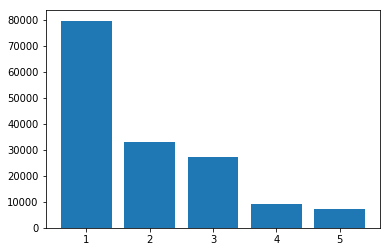

In [8]:
#hence we realize that there are no null values in the data.
%matplotlib inline
import matplotlib.pyplot as plt
Mood_count=df['Sentiment'].value_counts()#Returns object containing counts of unique values.
print(Mood_count)
x=[1,2,3,4,5]#at these x cordinates
#Mood_count.plot()
plt.bar(x,Mood_count)#at x=10 we get 
#plt.xticks(x,['neutral','somewhat positive','somewhat negative','positive','negative'],degree=45)


In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anubha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def tweet_to_words(inputtweet):
     letters_only = re.sub("[^a-zA-Z]", " ",inputtweet) #now our tweet doesn't conatin symobols and are just english letters 
     #print(letters_only)
     words = letters_only.lower().split()#we convert all to lowerscase and use split
     #print(words)
     stops = set(stopwords.words("english"))                  
     meaningful_words = [w for w in words if not w in stops] 
     return( " ".join( meaningful_words )) 
 #this function returns the length of tweet and is same as above
def tweet_length(inputtweet):
    letters_only = re.sub("[^a-zA-Z]", " ",inputtweet) #now our tweet doesn't conatin symobols and are just english letters 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [11]:
df['clean_text']=df['Phrase'].apply(lambda x: tweet_to_words(x))
df['length']=df['Phrase'].apply(lambda x: tweet_length(x))

In [12]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_text,length
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,15
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,6
2,3,1,A series,2,series,1
3,4,1,A,2,,0
4,5,1,series,2,series,1


In [13]:
p=df[df['length']==0]
df.drop(p.index, inplace=True)

In [14]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_text,length
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,15
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,6
2,3,1,A series,2,series,1
4,5,1,series,2,series,1
5,6,1,of escapades demonstrating the adage that what...,2,escapades demonstrating adage good goose,5


In [15]:
test = pd.read_csv("test.csv")

In [16]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [17]:
test['clean_text']=test['Phrase'].apply(lambda x: tweet_to_words(x))
test['length']=test['Phrase'].apply(lambda x: tweet_length(x))

In [18]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_text,length
0,1,1,A series of escapades demonstrating the adage ...,1,series escapades demonstrating adage good goos...,15
1,2,1,A series of escapades demonstrating the adage ...,2,series escapades demonstrating adage good goose,6
2,3,1,A series,2,series,1
4,5,1,series,2,series,1
5,6,1,of escapades demonstrating the adage that what...,2,escapades demonstrating adage good goose,5


In [19]:
test.head()

,PhraseId,SentenceId,Phrase,clean_text,length
0,156061,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5
1,156062,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5
2,156063,8545,An,,0
3,156064,8545,intermittently pleasing but mostly routine effort,intermittently pleasing mostly routine effort,5
4,156065,8545,intermittently pleasing but mostly routine,intermittently pleasing mostly routine,4


In [20]:
q=test[test['length']==0]
test.drop(q.index, inplace=True)

In [21]:
X_test= test['clean_text']

In [22]:
test.head()
len(test)
len(X_test)

65540

In [23]:
#Deviding train set into test and train to find its accurary
#then working on given test set
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(df['clean_text'], 
                                                    df['Sentiment'],test_size=0.2, 
                                                    random_state=0)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer().fit(X_train1)
p=max(v.get_feature_names(),key=lambda token:len(token))#tells to take len factor while considering maxi
 #Your answer here

In [25]:
 X_train_vectorized1 = v.transform(X_train1)

In [26]:
X_test_vectorized1 = v.transform(X_test1)

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train_vectorized1,y_train1)
pred_y=clf.predict(v.transform(X_test1))

In [28]:
pred_y

array([2, 2, 3, ..., 2, 2, 2], dtype=int64)

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [31]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(X_train1)

X_train_vectorized1 = vect.transform(X_train1)
X_train_vectorized1= add_feature(X_train_vectorized1,X_train1.str.len())
X_test_vectorized1 = vect.transform(X_test1)
X_test_vectorized1 = add_feature(X_test_vectorized1, X_test1.str.len())
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
model.fit(X_train_vectorized1, y_train1)
predictions = model.predict(X_test_vectorized1)
accuracy_score(y_test1,predictions)

0.63300675784912863

In [33]:
predictions

array([2, 2, 3, ..., 2, 2, 2], dtype=int64)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100,class_weight='balanced')
model.fit(X_train_vectorized1, y_train1)
predictions = model.predict(X_test_vectorized1)
accuracy_score(y_test1,predictions)

0.62405018268826595

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1,class_weight='balanced')
model.fit(X_train_vectorized1, y_train1)
predictions = model.predict(X_test_vectorized1)
accuracy_score(y_test1,predictions)

0.64500274840754035

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.001)
clf.fit(X_train_vectorized1,y_train1)
pred_y=clf.predict(X_test_vectorized1)

In [37]:
accuracy_score(y_test1,pred_y)

0.6112458369709316

In [38]:
#The random forest and svm are taking very long to work, so skipping those models.
#Best accuracy in Logistic Regression with c=1
#Using that model for the test set

In [39]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())

In [40]:
len(X_test)

65540

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1,class_weight='balanced')
model.fit(X_train_vectorized1, y_train1)
predictions = model.predict(X_test_vectorized1)
accuracy_score(y_test1,predictions)

0.64500274840754035

In [42]:
predictions_fun = model.predict(X_test_vectorized)



In [43]:
len(predictions_fun)

#len(test)




65540

In [44]:
test['senti']=predictions_fun

In [45]:
test.head()

,PhraseId,SentenceId,Phrase,clean_text,length,senti
0,156061,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5,3
1,156062,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5,3
3,156064,8545,intermittently pleasing but mostly routine effort,intermittently pleasing mostly routine effort,5,3
4,156065,8545,intermittently pleasing but mostly routine,intermittently pleasing mostly routine,4,3
5,156066,8545,intermittently pleasing but,intermittently pleasing,2,3


In [48]:
new_test=test

In [49]:
index=test['SentenceId']

In [51]:
new_test.head()

,PhraseId,SentenceId,Phrase,clean_text,length,senti
0,156061,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5,3
1,156062,8545,An intermittently pleasing but mostly routine ...,intermittently pleasing mostly routine effort,5,3
3,156064,8545,intermittently pleasing but mostly routine effort,intermittently pleasing mostly routine effort,5,3
4,156065,8545,intermittently pleasing but mostly routine,intermittently pleasing mostly routine,4,3
5,156066,8545,intermittently pleasing but,intermittently pleasing,2,3


In [52]:
new_test=new_test.drop(['SentenceId'], axis=1)

In [53]:
#new_test=new_test.drop(['Phrase'], axis=1)
new_test=new_test.drop(['clean_text'], axis=1)
new_test=new_test.drop(['length'], axis=1)

In [54]:
new_test=new_test.drop(['Phrase'], axis=1)


In [55]:
new_test['Sentiment']=new_test['senti']

In [56]:
new_test.head()
new_test=new_test.drop(['senti'], axis=1)

In [57]:
new_test.head()

,PhraseId,Sentiment
0,156061,3
1,156062,3
3,156064,3
4,156065,3
5,156066,3


In [58]:
new_test.to_csv('final_text.csv', index=False)